In [18]:
import pandas as pd

df = pd.read_csv("satyrr_leg_spring (1).csv")

df.columns = range(len(df.columns))

#0: time
#34: hip torque
#35: hip torque
#37: current hip angle (averaged)
#38: desired hip angle
df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,393.834991,0.000018,0.001782,0.0,0.0,-1.575623,-1.575553,-0.038852,0.0,0.000012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,393.839996,-0.000000,0.000000,0.0,0.0,-1.575525,-1.575834,-0.038852,0.0,0.000021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,393.845001,-0.000000,0.000000,0.0,0.0,-1.575429,-1.575585,-0.038852,0.0,0.000012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,393.850006,-0.000000,0.000000,0.0,0.0,-1.575350,-1.575852,-0.038852,0.0,0.000012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,393.855011,-0.000000,0.000000,0.0,0.0,-1.575300,-1.576202,-0.038852,0.0,0.000021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26050,524.085022,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.038852,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26051,524.090027,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.038852,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26052,524.094971,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.038852,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26053,524.099976,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.038852,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_3160/2312983092.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, fit_fn_mid(x), 'k--', label=f'Fit: y = {coeffs3[0]:.4f}x + {coeffs3[1]:.4f}', color='magenta')


Text(0, 0.5, 'Hip torque (avg between L and R)')

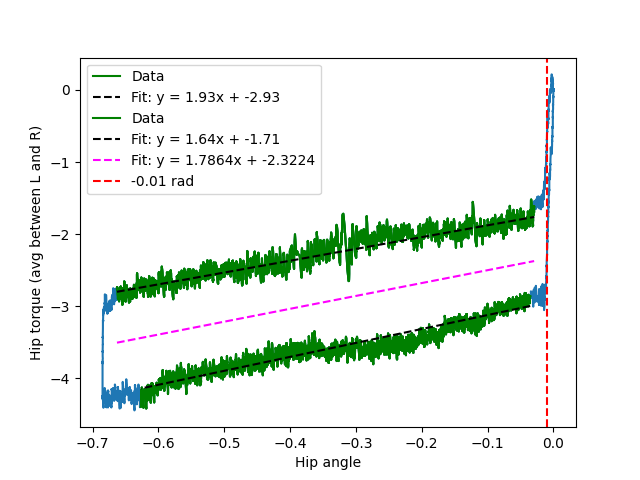

In [63]:
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np

df['t'] = df[0]
df['torque'] = (df[34]-df[35])/2.0
df['angle'] = df[37]
plt.figure()
plt.plot(df['angle'], df['torque'])

mask = (df['t'] < 460) & (df['t'] > 409)
# plt.figure()
x = df['angle'][mask]
y = df['torque'][mask]
plt.plot(x, y, 'g')
coeffs1 = np.polyfit(x, y, 1)  # 1 means linear
fit_fn = np.poly1d(coeffs1)
plt.plot(x, y, 'g', label='Data')
plt.plot(x, fit_fn(x), 'k--', label=f'Fit: y = {coeffs1[0]:.2f}x + {coeffs1[1]:.2f}')
plt.legend()

mask = (df['t'] > 475) & (df['t'] < 509)
# plt.figure()
x = df['angle'][mask]
y = df['torque'][mask]
plt.plot(x, y, 'g')
coeffs2 = np.polyfit(x, y, 1)  # 1 means linear
fit_fn = np.poly1d(coeffs2)
plt.plot(x, y, 'g', label='Data')
plt.plot(x, fit_fn(x), 'k--', label=f'Fit: y = {coeffs2[0]:.2f}x + {coeffs2[1]:.2f}')


coeffs3 = (coeffs1+coeffs2)/2.0
fit_fn_mid = np.poly1d(coeffs3)
plt.plot(x, fit_fn_mid(x), 'k--', label=f'Fit: y = {coeffs3[0]:.4f}x + {coeffs3[1]:.4f}', color='magenta')
plt.axvline(x=-0.01, color='r', linestyle='--', label='-0.01 rad')
plt.legend()
plt.xlabel("Hip angle")
plt.ylabel("Hip torque (avg between L and R)")




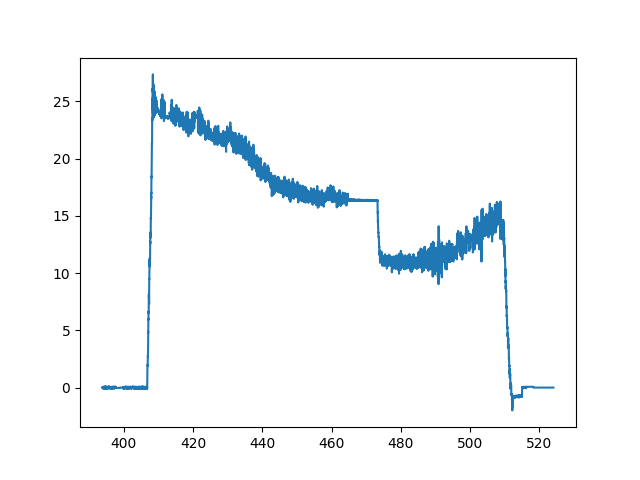

In [64]:
th_nom = 0.3672
L_leg = 0.15
leg_jac = -2*L_leg*np.sin(-df['angle'] + th_nom)

plt.figure()
plt.plot(df['t'], df['torque']/leg_jac)

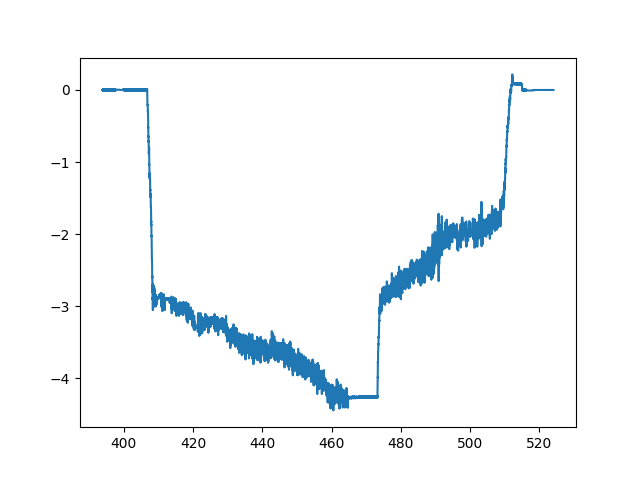

In [65]:

plt.figure()
plt.plot(df['t'], df['torque'])